In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [167]:
stock_df = df.drop(['Adj Close', 'Volume'], axis = 1)
stock_df.head()

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001


In [168]:
datetime_df = df.drop(['Adj Close', 'Volume'], axis = 1)
datetime_df['Date'] = pd.to_datetime(datetime_df['Date'])
datetime_df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [169]:
print(type(datetime_df['Date'][0]))
datetime_df

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [170]:
datetime_df['year'] = ''
datetime_df['month'] = ''

In [171]:
for i in range(len(datetime_df['Date'])):
  datetime_df.loc[i, 'month'] = datetime_df['Date'][i].month
  datetime_df.loc[i, 'year'] = datetime_df['Date'][i].year
datetime_df.head(10)

,Date,Open,High,Low,Close,year,month
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,2018,2
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,2018,2
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,2018,2
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,2018,2
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,2018,2
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,2018,2
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,2018,2
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,2018,2
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,2018,2
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,2018,2


In [172]:
filtered_df = datetime_df[datetime_df['year'] >= 2021]
filtered_df.head()

,Date,Open,High,Low,Close,year,month
733,2021-01-04,539.000000,540.799988,515.090027,522.859985,2021,1
734,2021-01-05,521.549988,526.780029,515.890015,520.799988,2021,1
735,2021-01-06,511.970001,513.099976,499.500000,500.489990,2021,1
736,2021-01-07,508.279999,516.440002,506.420013,508.890015,2021,1
737,2021-01-08,511.309998,513.239990,504.510010,510.399994,2021,1


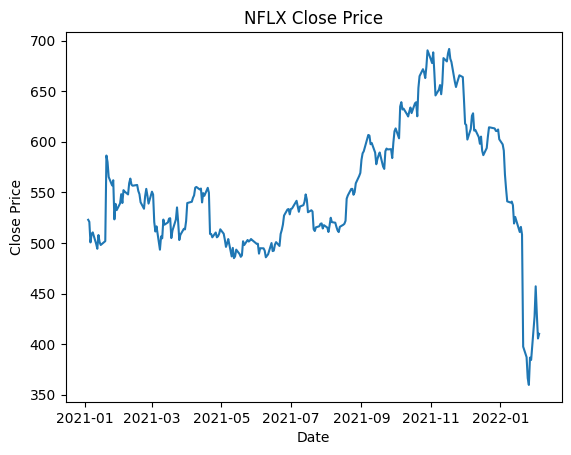

In [173]:
x = filtered_df['Date']
y = filtered_df['Close']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NFLX Close Price')
plt.show()

In [174]:
close_max = filtered_df['Close'].max()
close_min = filtered_df['Close'].min()
print(f'최고 종가: {close_max}')
print(f'최저 종가: {close_min}')

최고 종가: 691.690002
최저 종가: 359.700012


In [175]:
result = filtered_df.groupby(['year', 'month'],)[['Close']].mean()
result.rename(columns={'Close' : '평균종가'})
print(result)

                 Close
year month            
2021 1      526.816845
     2      548.959999
     3      518.123482
     4      533.136662
     5      496.714497
     6      503.324091
     7      528.653330
     8      532.346817
     9      590.795239
     10     642.202849
     11     667.524286
     12     608.484089
2022 1      487.853500
     2      425.595009


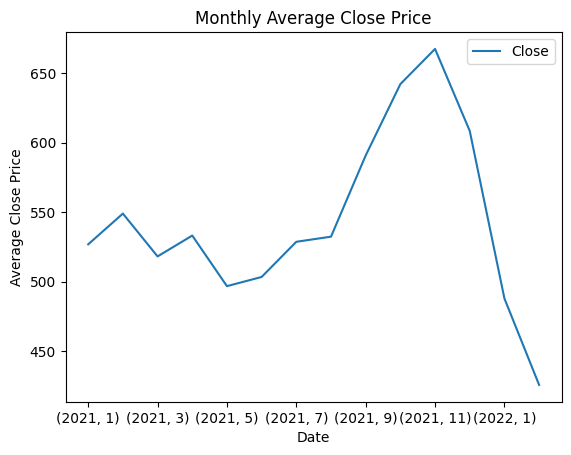

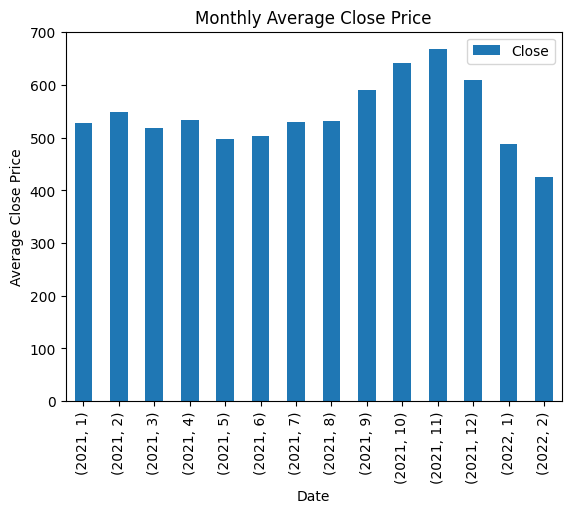

In [176]:
line1 = result.plot(kind = 'line', title = 'Monthly Average Close Price', xlabel = 'Date', ylabel = 'Average Close Price')
bar1 = result.plot(kind = 'bar', title = 'Monthly Average Close Price', xlabel = 'Date', ylabel = 'Average Close Price')

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


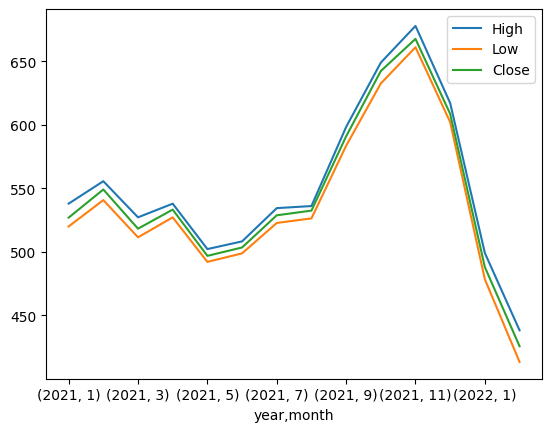

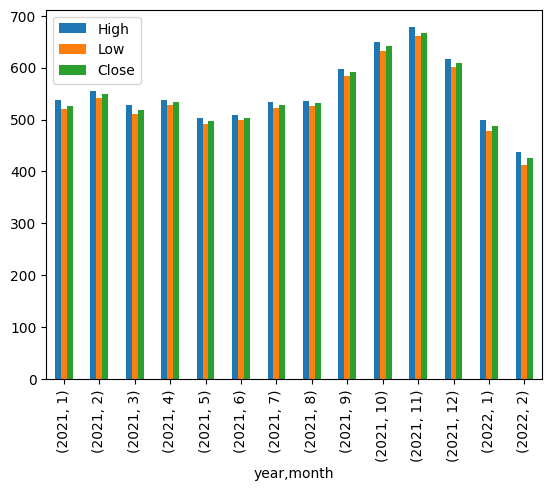

In [177]:
result2 = filtered_df.groupby(['year', 'month'],)[['High','Low','Close']].mean()
line2 = result2.plot(kind = 'line')
bar2 = result2.plot(kind = 'bar')
print(line2)
print(bar2)

In [178]:
filtered_df2 = datetime_df[datetime_df['year'] >= 2022]
filtered_df2.head()

,Date,Open,High,Low,Close,year,month
985,2022-01-03,605.609985,609.989990,590.559998,597.369995,2022,1
986,2022-01-04,599.909973,600.409973,581.599976,591.150024,2022,1
987,2022-01-05,592.000000,592.840027,566.880005,567.520020,2022,1
988,2022-01-06,554.340027,563.359985,542.010010,553.289978,2022,1
989,2022-01-07,549.460022,553.429993,538.219971,541.059998,2022,1


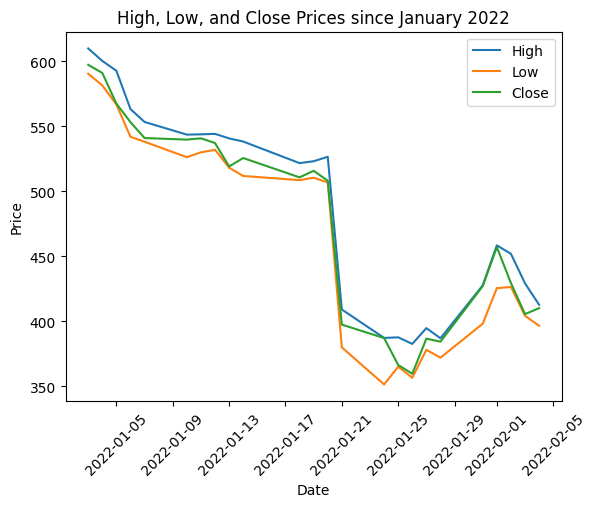

In [184]:
x = filtered_df2['Date']
y = filtered_df2['Close']
y2 = filtered_df2['High']
y3 = filtered_df2['Low']
plt.plot(x, y2, label = 'High')
plt.plot(x,y3, label = 'Low')
plt.plot(x, y, label = 'Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High, Low, and Close Prices since January 2022')
plt.xticks(rotation=45)
plt.legend()
plt.show()